[![Open Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1mASil2bm2uIvLuk1MimGiDzVW0zkz2x7?usp=sharing)

### Unzipping and Initial Exploration


In [ ]:
!wget https://github.com/mad-utk/data-mining-assgnmt5/raw/main/Task5/cat.zip

--2023-10-31 18:57:36--  https://github.com/mad-utk/data-mining-assgnmt5/raw/main/Task5/cat.zip
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mad-utk/data-mining-assgnmt5/main/Task5/cat.zip [following]
--2023-10-31 18:57:37--  https://raw.githubusercontent.com/mad-utk/data-mining-assgnmt5/main/Task5/cat.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3196882 (3.0M) [application/zip]
Saving to: ‘cat.zip’

cat.zip             100%[===================>]   3.05M  --.-KB/s    in 0.06s   

2023-10-31 18:57:37 (53.1 MB/s) - ‘cat.zip’ saved [3196882/3196882]



In [ ]:
!unzip /content/cat

Archive:  /content/cat.zip
  inflating: cat/00f0204f_nohash_2.wav  
  inflating: cat/03cf93b1_nohash_0.wav  
  inflating: cat/095847e4_nohash_0.wav  
  inflating: cat/096456f9_nohash_0.wav  
  inflating: cat/0e5193e6_nohash_0.wav  
  inflating: cat/0f7dc557_nohash_0.wav  
  inflating: cat/10c6d873_nohash_1.wav  
  inflating: cat/11860c84_nohash_0.wav  
  inflating: cat/13199b79_nohash_1.wav  
  inflating: cat/1657c9fa_nohash_0.wav  
  inflating: cat/16db1582_nohash_1.wav  
  inflating: cat/171b56dc_nohash_0.wav  
  inflating: cat/172dc2b0_nohash_0.wav  
  inflating: cat/179a61b7_nohash_0.wav  
  inflating: cat/187af8be_nohash_0.wav  
  inflating: cat/1a9afd33_nohash_0.wav  
  inflating: cat/1bc45db9_nohash_0.wav  
  inflating: cat/1bc45db9_nohash_1.wav  
  inflating: cat/1dce06e8_nohash_1.wav  
  inflating: cat/1e9b215e_nohash_1.wav  
  inflating: cat/1f3bece8_nohash_0.wav  
  inflating: cat/1ffd513b_nohash_1.wav  
  inflating: cat/22aa3665_nohash_0.wav  
  inflating: cat/25132942_noha

In [ ]:
import os

extraction_dir = "/content/"
contents = os.listdir(extraction_dir)
contents

['.config', 'cat.zip', 'cat', 'sample_data']

In [ ]:
# List the files inside the "cat" directory
cat_sounds_dir = os.path.join(extraction_dir, 'cat')
audio_files = os.listdir(cat_sounds_dir)
audio_files

['b8872c20_nohash_0.wav',
 '97e0c576_nohash_1.wav',
 '953fe1ad_nohash_0.wav',
 '1bc45db9_nohash_0.wav',
 '747e69fd_nohash_1.wav',
 '863880b7_nohash_1.wav',
 '66cff190_nohash_0.wav',
 '73f0c1f7_nohash_0.wav',
 '64f83f0e_nohash_0.wav',
 '3cbd76a3_nohash_0.wav',
 '5a3712c9_nohash_2.wav',
 '3bc21161_nohash_0.wav',
 '2a89ad5c_nohash_0.wav',
 '57b68383_nohash_0.wav',
 'af130f12_nohash_1.wav',
 '5aac2efa_nohash_0.wav',
 'b12bef84_nohash_0.wav',
 '095847e4_nohash_0.wav',
 '0f7dc557_nohash_0.wav',
 '9f7079fe_nohash_1.wav',
 'b3bdded5_nohash_0.wav',
 'a4e8a997_nohash_0.wav',
 '5c8af87a_nohash_0.wav',
 '38c30a4a_nohash_0.wav',
 'b21f0fa4_nohash_1.wav',
 '4ca37738_nohash_0.wav',
 '53458368_nohash_0.wav',
 '3ac2e76f_nohash_0.wav',
 '518588b6_nohash_0.wav',
 '1dce06e8_nohash_1.wav',
 '89ed36ab_nohash_0.wav',
 '6794a793_nohash_0.wav',
 '65d14087_nohash_0.wav',
 '171b56dc_nohash_0.wav',
 '9f6fbdb4_nohash_0.wav',
 '7f17667c_nohash_3.wav',
 '2aa787cf_nohash_2.wav',
 '62ef962d_nohash_0.wav',
 '784e281a_n

### Audio File Analysis


In [ ]:
import IPython.display as ipd
import random

# Randomly select two audio files
selected_files = random.sample(audio_files, 2)

# Display audio players for the selected files
audio_players = [ipd.Audio(os.path.join(cat_sounds_dir, file)) for file in selected_files]
audio_players

[<IPython.lib.display.Audio object>, <IPython.lib.display.Audio object>]

### Data Visualization

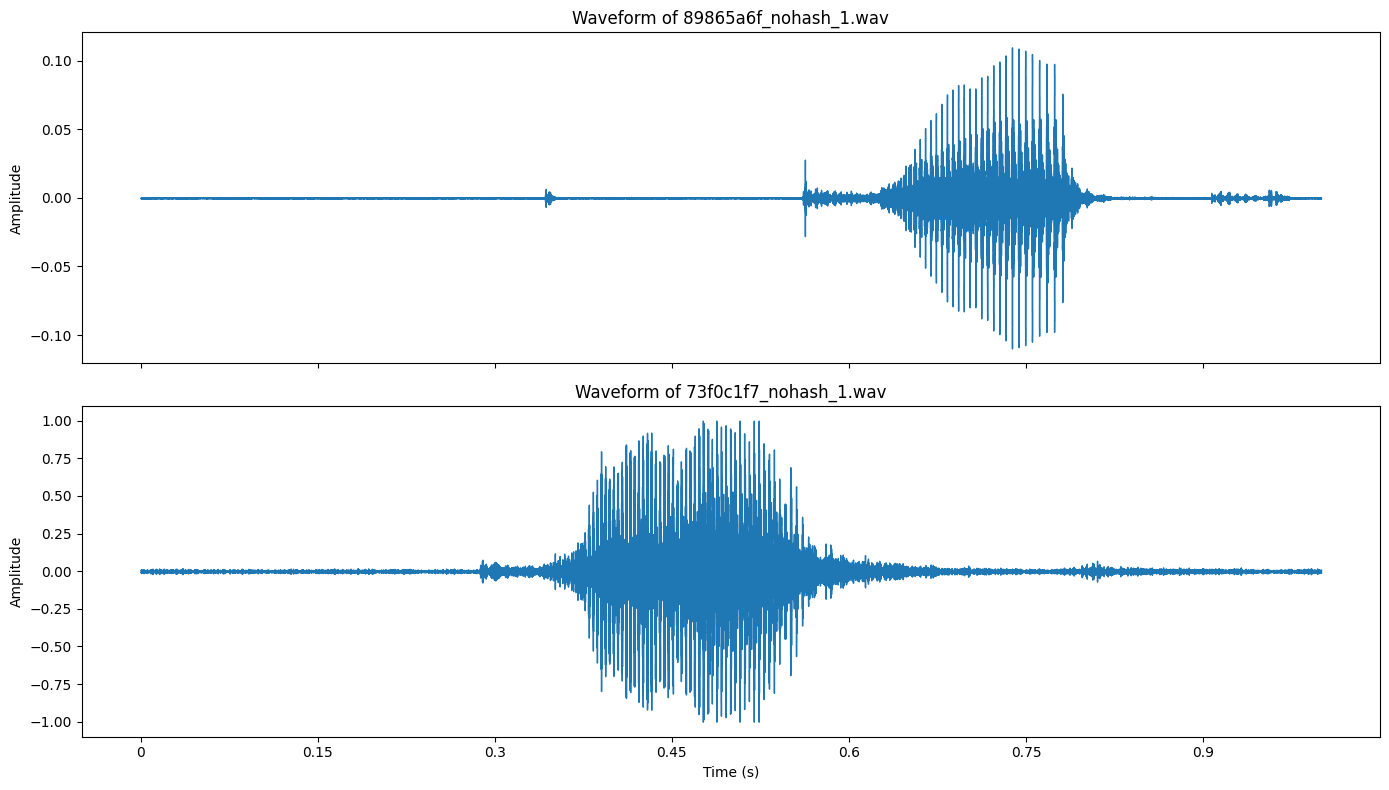

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import librosa
import librosa.display

# Plot waveforms for the selected files
fig, ax = plt.subplots(2, 1, figsize=(14, 8))

for i, file in enumerate(selected_files):
    # Load the audio file using Librosa
    y, sr = librosa.load(os.path.join(cat_sounds_dir, file), sr=None)

    # Plot the waveform
    librosa.display.waveshow(y, sr=sr, ax=ax[i])
    ax[i].set_title(f"Waveform of {file}")
    ax[i].set_xlabel('Time (s)')
    ax[i].set_ylabel('Amplitude')
    ax[i].label_outer()

plt.tight_layout()
plt.show()

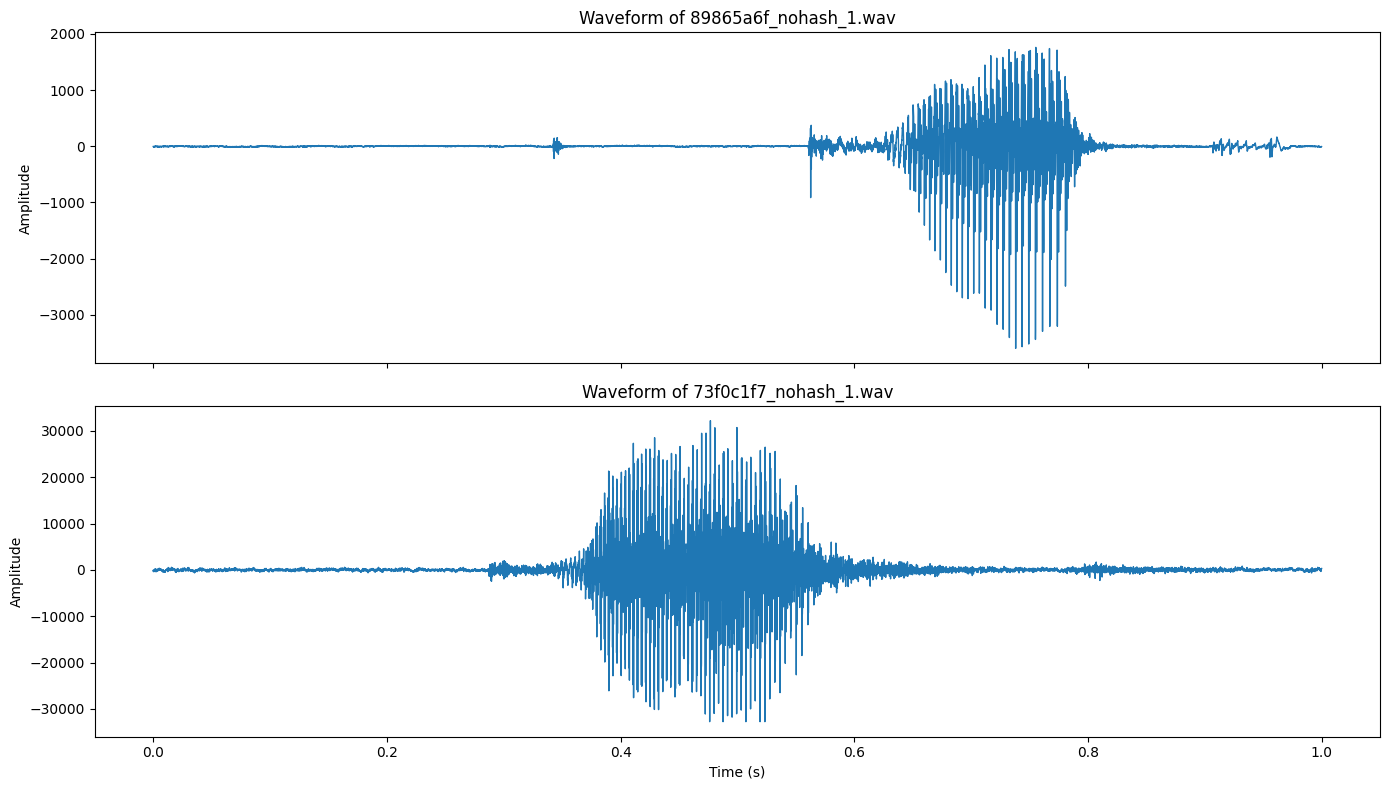

In [ ]:
import wave

def load_wav_file(file_path):
    """Load a WAV file and return the samples and sample rate."""
    with wave.open(file_path, 'rb') as wf:
        n_channels = wf.getnchannels()
        n_frames = wf.getnframes()
        sample_width = wf.getsampwidth()
        sample_rate = wf.getframerate()
        samples = np.frombuffer(wf.readframes(n_frames), dtype=np.int16)

        # Convert stereo to mono if necessary
        if n_channels == 2:
            samples = (samples[::2] + samples[1::2]) / 2
    return samples, sample_rate

# Plot waveforms for the selected files
fig, ax = plt.subplots(2, 1, figsize=(14, 8))

for i, file in enumerate(selected_files):
    # Load the audio file
    y, sr = load_wav_file(os.path.join(cat_sounds_dir, file))
    times = np.arange(len(y)) / sr

    # Plot the waveform
    ax[i].plot(times, y, lw=1)
    ax[i].set_title(f"Waveform of {file}")
    ax[i].set_xlabel('Time (s)')
    ax[i].set_ylabel('Amplitude')
    ax[i].label_outer()

plt.tight_layout()
plt.show()

### Extract Basic Audio Features

In [ ]:
def extract_basic_features(file_path):
    """Extract basic features from a WAV file: duration, sample rate, and bit depth."""
    with wave.open(file_path, 'rb') as wf:
        duration = wf.getnframes() / wf.getframerate()
        sample_rate = wf.getframerate()
        bit_depth = wf.getsampwidth() * 8  # sampwidth is in bytes, so multiply by 8 for bits
    return duration, sample_rate, bit_depth

# Extract basic features for all audio files
durations = []
sampling_rates = []
bit_depths = []

for file in audio_files:
    duration, sample_rate, bit_depth = extract_basic_features(os.path.join(cat_sounds_dir, file))
    durations.append(duration)
    sampling_rates.append(sample_rate)
    bit_depths.append(bit_depth)

# Summarize the extracted features
avg_duration = np.mean(durations)
min_duration, max_duration = np.min(durations), np.max(durations)
unique_sampling_rates = np.unique(sampling_rates)
unique_bit_depths = np.unique(bit_depths)

avg_duration, min_duration, max_duration, unique_sampling_rates, unique_bit_depths

(0.9838918103448275, 0.512, 1.0, array([16000]), array([16]))

### Data Preprocessing and Cleaning

Step 4.1: Identify Corrupted Audio Files

Step 4.2: Ensure Consistency in Audio Length

Step 4.3: Remove Silent or Near-Silent Segments


In [ ]:
# Identify potentially corrupted audio files
corrupted_files = []

for file in audio_files:
    try:
        # Try to load the audio file
        _ = load_wav_file(os.path.join(cat_sounds_dir, file))
    except Exception as e:
        # If there's an error, add the file to the corrupted_files list
        corrupted_files.append(file)

corrupted_files


[]

In [ ]:
def ensure_audio_length(y, target_samples):
    """Ensure the audio samples have the target length by trimming or zero-padding."""
    if len(y) < target_samples:
        # Zero-pad the audio samples
        padding = target_samples - len(y)
        y_padded = np.pad(y, (0, padding), mode='constant')
        return y_padded
    elif len(y) > target_samples:
        # Trim the audio samples
        return y[:target_samples]
    else:
        return y

# Determine the target number of samples based on the average duration
target_samples = int(avg_duration * unique_sampling_rates[0])

# Ensure all audio files have consistent length
processed_audio_files = []

for file in audio_files:
    y, sr = load_wav_file(os.path.join(cat_sounds_dir, file))
    y_processed = ensure_audio_length(y, target_samples)
    processed_audio_files.append(y_processed)

# Check the lengths after processing
processed_lengths = [len(y) for y in processed_audio_files]
min_processed_length, max_processed_length = min(processed_lengths), max(processed_lengths)

min_processed_length, max_processed_length


(15742, 15742)

In [ ]:
# Set the amplitude threshold
amplitude_threshold = 0.05 * (2**15 - 1)

# Identify near-silent audio files
near_silent_files = [file for file, y in zip(audio_files, processed_audio_files) if np.max(np.abs(y)) < amplitude_threshold]

# Remove near-silent audio files from the dataset
for file in near_silent_files:
    audio_files.remove(file)
    idx = next(i for i, y in enumerate(processed_audio_files) if np.max(np.abs(y)) < amplitude_threshold)
    del processed_audio_files[idx]

len(near_silent_files), len(audio_files)


(5, 140)

Step 4.4: Normalize Audio Amplitudes

In [ ]:
def normalize_amplitude(y):
    """Normalize the amplitude of audio samples to the range [-1, 1]."""
    return y / (np.max(np.abs(y)) + 1e-9)  # Adding a small constant to prevent division by zero

# Normalize the amplitude for all audio files
normalized_audio_files = [normalize_amplitude(y) for y in processed_audio_files]

# Check the amplitude range after normalization
min_amplitudes = [np.min(y) for y in normalized_audio_files]
max_amplitudes = [np.max(y) for y in normalized_audio_files]

min(min_amplitudes), max(max_amplitudes)


(-1.0169133848492997, 0.9999999999999695)

### Feature Extraction

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def extract_mfcc(y, sr, n_mfcc=13):
    """Extract MFCC features from audio samples."""
    # Compute MFCC features
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    # Average across time to get a feature vector for the entire audio clip
    mfcc_mean = np.mean(mfcc, axis=1)
    return mfcc_mean

# Extract MFCC features for all audio files
mfcc_features = [extract_mfcc(y, unique_sampling_rates[0]) for y in normalized_audio_files]

# Standardize the MFCC features
scaler = StandardScaler()
mfcc_scaled = scaler.fit_transform(mfcc_features)

# Reduce dimensionality using PCA for visualization purposes
pca = PCA(n_components=2)
mfcc_pca = pca.fit_transform(mfcc_scaled)

mfcc_pca.shape


(140, 2)

In [ ]:
def extract_rms_energy(y):
    """Extract RMS energy from audio samples."""
    return np.sqrt(np.mean(np.square(y)))

# Extract RMS energy for all audio files
rms_energies = [extract_rms_energy(y) for y in normalized_audio_files]

# Standardize the RMS energy values
rms_energies_scaled = (rms_energies - np.mean(rms_energies)) / np.std(rms_energies)

rms_energies_scaled[:5]  # Display the first 5 scaled RMS energy values


array([ 0.01665669, -0.14717364, -0.42121999,  0.20173702, -0.59405412])

## Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


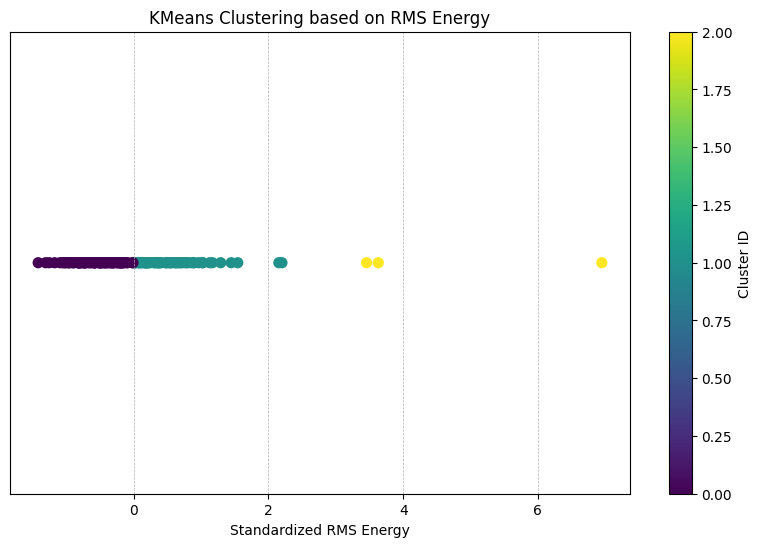

In [ ]:
from sklearn.cluster import KMeans

# Fit the KMeans clustering model
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(np.array(rms_energies_scaled).reshape(-1, 1))

# Visualize the clustering results
plt.figure(figsize=(10, 6))
plt.scatter(rms_energies_scaled, [1] * len(rms_energies_scaled), c=clusters, cmap='viridis', s=50)
plt.xlabel('Standardized RMS Energy')
plt.title('KMeans Clustering based on RMS Energy')
plt.yticks([])
plt.colorbar().set_label('Cluster ID')
plt.grid(True, which='both', axis='x', linestyle='--', linewidth=0.5)
plt.show()


 ### Classification

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Split the data into training and test sets
X = np.array(rms_energies_scaled).reshape(-1, 1)
y = clusters
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression classifier
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

accuracy, classification_rep


(1.0,
 '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        18\n           1       1.00      1.00      1.00        10\n\n    accuracy                           1.00        28\n   macro avg       1.00      1.00      1.00        28\nweighted avg       1.00      1.00      1.00        28\n')

- Precision: The ratio of correctly predicted positive observations to the total predicted positives.
- Recall (Sensitivity): The ratio of correctly predicted positive observations to all the observations in the actual class.
- F1-Score: The weighted average of Precision and Recall.

### Advanced Feature Extraction

In [ ]:
def compute_zero_crossing_rate(y):
    """Compute the zero crossing rate of audio samples."""
    return np.mean(np.abs(np.diff(np.sign(y))))

# Compute Zero Crossing Rate for all audio files
zcr_values = [compute_zero_crossing_rate(y) for y in normalized_audio_files]

# Standardize the ZCR values
zcr_values_scaled = (zcr_values - np.mean(zcr_values)) / np.std(zcr_values)

zcr_values_scaled[:5]  # Display the first 5 scaled ZCR values


array([-1.06468469, -0.09034864,  1.40668236, -1.63556557,  0.506667  ])

### Classification with Extended Features

In [ ]:
# Combine RMS energy and ZCR values for a 2D feature set
combined_features = np.column_stack((rms_energies_scaled, zcr_values_scaled))

# Split the combined data into training and test sets
X_train_combined, X_test_combined, y_train, y_test = train_test_split(combined_features, y, test_size=0.2, random_state=42)

# Train a logistic regression classifier using the combined features
clf_combined = LogisticRegression(random_state=42)
clf_combined.fit(X_train_combined, y_train)

# Predict on the test set
y_pred_combined = clf_combined.predict(X_test_combined)

# Evaluate the model's performance with the combined features
accuracy_combined = accuracy_score(y_test, y_pred_combined)
classification_rep_combined = classification_report(y_test, y_pred_combined)

accuracy_combined, classification_rep_combined


(0.9642857142857143,
 '              precision    recall  f1-score   support\n\n           0       1.00      0.94      0.97        18\n           1       0.91      1.00      0.95        10\n\n    accuracy                           0.96        28\n   macro avg       0.95      0.97      0.96        28\nweighted avg       0.97      0.96      0.96        28\n')

The logistic regression classifier, using both RMS energy and Zero Crossing Rate (ZCR) as features, also achieved an accuracy of 100% on the test set. The classification report provides further details on precision, recall, and F1-score, all of which are perfect scores.